In [1]:
import sqlite3
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from itertools import cycle, islice
from math import sqrt
%matplotlib inline

In [2]:
# Create connection
cnx = sqlite3.connect('wfdata.sqlite')

In [3]:
# Tables
res = cnx.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print (name[0])

spatial_ref_sys
spatialite_history
sqlite_sequence
geometry_columns
spatial_ref_sys_aux
views_geometry_columns
virts_geometry_columns
geometry_columns_statistics
views_geometry_columns_statistics
virts_geometry_columns_statistics
geometry_columns_field_infos
views_geometry_columns_field_infos
virts_geometry_columns_field_infos
geometry_columns_time
geometry_columns_auth
views_geometry_columns_auth
virts_geometry_columns_auth
sql_statements_log
SpatialIndex
ElementaryGeometries
KNN
Fires
idx_Fires_Shape
idx_Fires_Shape_node
idx_Fires_Shape_rowid
idx_Fires_Shape_parent
NWCG_UnitIDActive_20170109


In [4]:
#df_t = pd.read_sql_query("SELECT * FROM Fires",cnx)

In [5]:
#df_t.shape

In [6]:
df = pd.read_sql_query("SELECT \
                            OBJECTID, FIRE_NAME,FIRE_YEAR, DISCOVERY_DATE, DISCOVERY_DOY, DISCOVERY_TIME, STAT_CAUSE_CODE,\
                            STAT_CAUSE_DESCR, CONT_DATE, CONT_DOY, CONT_TIME, FIRE_SIZE, FIRE_SIZE_CLASS, LATITUDE,\
                            LONGITUDE, OWNER_CODE, OWNER_DESCR, STATE, COUNTY, FIPS_NAME\
                                FROM Fires", cnx)

In [7]:
df.head()

,OBJECTID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_NAME
0,1,FOUNTAIN,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,Plumas
1,2,PIGEON,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,Placer
2,3,SLACK,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,El Dorado
3,4,DEER,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,Alpine
4,5,STEVENOT,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,Alpine


In [8]:
df.shape

(1880465, 20)

In [9]:
# number of fires for a given year
numFire_year = df['FIRE_YEAR'].value_counts().sort_index()

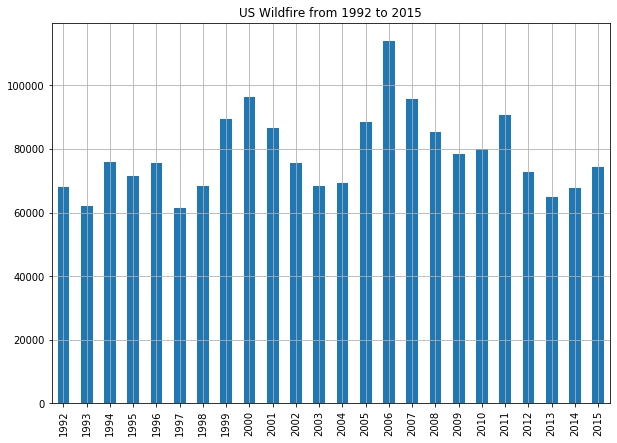

In [10]:
# the whole country
numFire_year.plot(kind = 'bar', grid=1, figsize =(10,7))
plt.title('US Wildfire from 1992 to 2015')
plt.show()


In [11]:
numFire_year.describe()

count        24.000000
mean      78352.708333
std       12759.039409
min       61450.000000
25%       68342.750000
50%       75615.000000
75%       87091.250000
max      114004.000000
Name: FIRE_YEAR, dtype: float64

In [12]:
# data for wildfire in California
df_CA = df[df['STATE']=='CA']

In [13]:
df_CA.head()

,OBJECTID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_NAME
0,1,FOUNTAIN,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,Plumas
1,2,PIGEON,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,Placer
2,3,SLACK,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,El Dorado
3,4,DEER,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,Alpine
4,5,STEVENOT,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,Alpine


In [14]:
numFire_year_CA = df_CA['FIRE_YEAR'].value_counts().sort_index()

In [15]:
numFire_year_CA

1992    10833
1993     8270
1994     8654
1995     7381
1996     9173
1997     7930
1998     6864
1999     8910
2000     6977
2001     8182
2002     7133
2003     7913
2004     7418
2005     6678
2006     8271
2007    10151
2008     7744
2009     6940
2010     5776
2011     8562
2012     7208
2013     8723
2014     6494
2015     7365
Name: FIRE_YEAR, dtype: int64

In [16]:
numFire_year_CA.describe()

count       24.000000
mean      7897.916667
std       1162.025178
min       5776.000000
25%       7094.000000
50%       7828.500000
75%       8585.000000
max      10833.000000
Name: FIRE_YEAR, dtype: float64

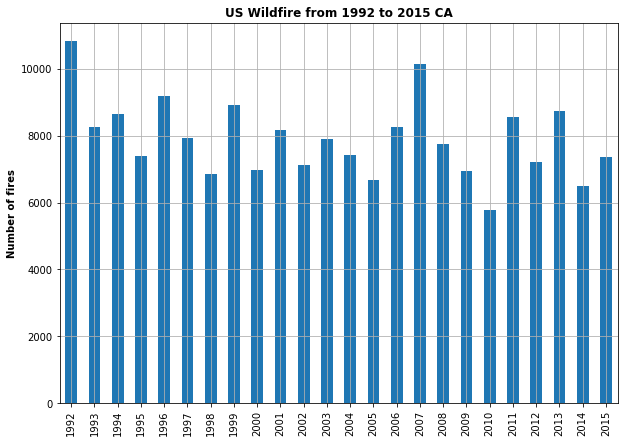

In [17]:
# CA
numFire_year_CA.plot(kind = 'bar', grid =1, figsize =(10,7))
plt.title('US Wildfire from 1992 to 2015 CA', fontweight ='bold')
plt.ylabel('Number of fires', fontweight ='bold')
plt.show()


In [18]:
counties = df_CA['FIPS_NAME'].value_counts().sort_values(ascending = False)
print('number of counties in CA =', len(counties))

number of counties in CA = 59


In [19]:
counties.describe()

count      59.000000
mean      952.898305
std      1091.072151
min         1.000000
25%       246.500000
50%       591.000000
75%      1265.000000
max      6925.000000
Name: FIPS_NAME, dtype: float64

In [20]:
#10 most fire-prone counties
counties[:10]

Riverside         6925
Los Angeles       2703
El Dorado         2676
San Bernardino    2642
San Diego         2443
Fresno            2183
Siskiyou          2156
Shasta            2118
Butte             1768
Kern              1737
Name: FIPS_NAME, dtype: int64

In [21]:
6925/2703

2.561968183499815

In [22]:
# least fire-prone counties
counties[-10:]

San Benito       157
Solano           149
Ventura          132
Kings            119
Colusa           111
Glenn             94
Marin             69
Sutter            68
San Francisco     15
Douglas            1
Name: FIPS_NAME, dtype: int64

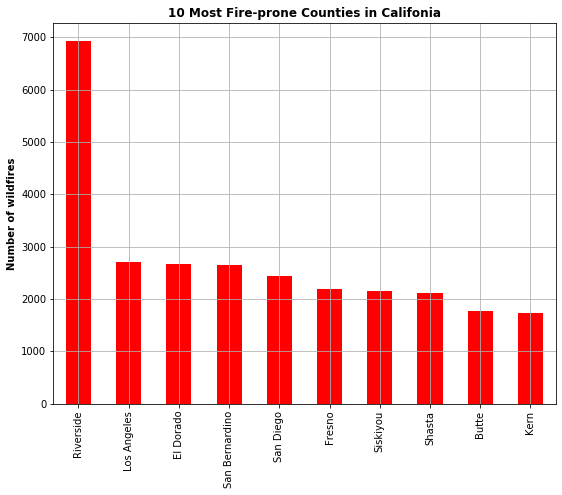

In [23]:
counties[:10].plot(kind = 'bar', grid = 1 , figsize =(9,7), color = 'r')
plt.title('10 Most Fire-prone Counties in Califonia',fontweight ='bold')
plt.ylabel('Number of wildfires', fontweight ='bold')
plt.show()


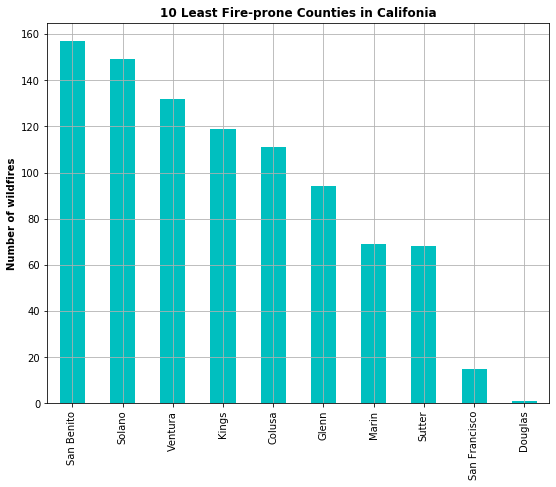

In [24]:
counties[-10:].plot(kind = 'bar', grid =1, figsize =(9,7), color = 'c')
plt.title('10 Least Fire-prone Counties in Califonia', fontweight='bold')
plt.ylabel('Number of wildfires', fontweight ='bold')
plt.show()

In [25]:
fire_size = df_CA['FIRE_SIZE_CLASS'].value_counts().sort_index()

In [26]:
fire_size

A    98309
B    76942
C     9825
D     2137
E     1187
F      756
G      394
Name: FIRE_SIZE_CLASS, dtype: int64

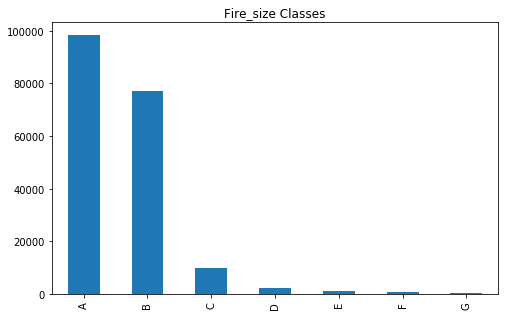

In [27]:
fire_size.plot(kind = 'bar',figsize =(8,5))
plt.title('Fire_size Classes')
plt.show()

In [28]:
fire_size_catagories ={'A' : '0.25', 'B': '0.26, 9.9', 'C': '10.0, 99.9', 'D': '100, 299', 'E': '300, 999',\
                       'F':'1000,4999', 'G':'5000'}

In [29]:
stat_cause = df_CA['STAT_CAUSE_DESCR'].value_counts().sort_values(ascending = False)

In [30]:
stat_cause

Miscellaneous        51943
Equipment Use        39407
Lightning            27000
Arson                19635
Debris Burning       14318
Missing/Undefined    12605
Campfire              9516
Children              6930
Smoking               5936
Powerline             1198
Railroad               720
Fireworks              219
Structure              123
Name: STAT_CAUSE_DESCR, dtype: int64

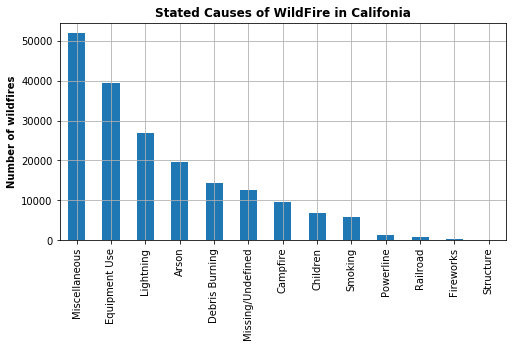

In [31]:
stat_cause.plot(kind = 'bar',figsize=(8,4), grid = 1)
plt.title('Stated Causes of WildFire in Califonia', fontweight ='bold')
plt.ylabel('Number of wildfires', fontweight='bold')
plt.show()

## #Data Cleaning to make prediction for cause of fire

In [32]:
len(df_CA)

189550

In [33]:
df_CA.isnull().any()

OBJECTID            False
FIRE_NAME            True
FIRE_YEAR           False
DISCOVERY_DATE      False
DISCOVERY_DOY       False
DISCOVERY_TIME       True
STAT_CAUSE_CODE     False
STAT_CAUSE_DESCR    False
CONT_DATE            True
CONT_DOY             True
CONT_TIME            True
FIRE_SIZE           False
FIRE_SIZE_CLASS     False
LATITUDE            False
LONGITUDE           False
OWNER_CODE          False
OWNER_DESCR         False
STATE               False
COUNTY               True
FIPS_NAME            True
dtype: bool

In [34]:
# percent of data dropped
def count_nan(data):
    return 100*(len(data) - len(data.dropna()))/ len(data)

In [35]:
count_nan(df_CA['CONT_DOY'])

51.51252967554735

In [36]:
count_nan(df_CA['COUNTY'])

70.33975204431549

In [37]:
len(df_CA['DISCOVERY_TIME'].dropna())

110217

In [38]:
df_CA_0 = df_CA[['OBJECTID', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',\
      'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE']]

In [39]:
len(df_CA_0)

189550

In [40]:
# percent of the data dropped because of NaN
count_nan(df_CA_0)

51.894486942759166

In [41]:
df_CA_1 = df_CA_0.dropna()
len(df_CA_1)

91184

In [42]:
df_CA_1.isnull().any()

OBJECTID           False
FIRE_YEAR          False
DISCOVERY_DATE     False
DISCOVERY_DOY      False
DISCOVERY_TIME     False
STAT_CAUSE_CODE    False
CONT_DATE          False
CONT_DOY           False
CONT_TIME          False
FIRE_SIZE          False
LATITUDE           False
LONGITUDE          False
OWNER_CODE         False
dtype: bool

### Predicting stated cause of fire 

In [43]:
df_CA_1.columns

Index(['OBJECTID', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'CONT_DATE', 'CONT_DOY',
       'CONT_TIME', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE'],
      dtype='object')

In [44]:
features = ['FIRE_YEAR','DISCOVERY_DATE','DISCOVERY_DOY','DISCOVERY_TIME',\
            'CONT_DATE', 'CONT_DOY','CONT_TIME','FIRE_SIZE', 'LATITUDE','LONGITUDE']

In [45]:
df['STAT_CAUSE_DESCR'].unique()

array(['Miscellaneous', 'Lightning', 'Debris Burning', 'Campfire',
       'Equipment Use', 'Arson', 'Children', 'Railroad', 'Smoking',
       'Powerline', 'Structure', 'Fireworks', 'Missing/Undefined'],
      dtype=object)

In [55]:
df[df['STAT_CAUSE_CODE']==3.0].head()

,OBJECTID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_NAME
181,182,TASSAJARA 1,2005,2453567.5,197,0315,3.0,Smoking,2453568.5,198.0,1500,0.3,B,36.242500,-121.551111,5.0,USFS,CA,None,None
182,183,TASSAJARA 2,2005,2453567.5,197,0545,3.0,Smoking,2453567.5,197.0,1830,0.1,A,36.242500,-121.548056,5.0,USFS,CA,None,None
195,196,CEMETERY POINT,2005,2453569.5,199,1600,3.0,Smoking,2453569.5,199.0,1630,0.1,A,41.264167,-111.795833,5.0,USFS,UT,57,Weber
231,232,PECHACHO,2005,2453563.5,193,1445,3.0,Smoking,2453563.5,193.0,1530,0.1,A,35.464444,-118.756389,5.0,USFS,CA,None,None
280,281,BEAR,2005,2453553.5,183,1230,3.0,Smoking,2453553.5,183.0,1500,0.1,A,34.414444,-111.009722,5.0,USFS,AZ,5,Coconino


In [47]:
stat_cause_dict = {'Miscellaneous': 9.0,
                    'Lightning':1.0,
                    'Debris Burning': 5.0,
                    'Missing/Undefined': 13.0,
                    'Equipment Use': 2.0,
                    'Campfire': 4.0,
                    'Children': 8.0,
                    'Smoking': 3.0,
                    'Railroad': 6.0,
                    'Powerline': 11.0, 
                    'Fireworks':10.0,
                    'Structure': 12.0,
                    'Arson': 7.0}

In [48]:
stat_cause_code = df['STAT_CAUSE_CODE'].unique().tolist()
print(stat_cause_code)

[9.0, 1.0, 5.0, 4.0, 2.0, 7.0, 8.0, 6.0, 3.0, 11.0, 12.0, 10.0, 13.0]


Partitioning the data
The data is shuffled and divided as follow:
85% of the data is used to perform bootstrap analysis of training variability. This data is partitioned into training and validation many times to produce many validation-set predictions for each example
70% Training: Used to train the model
15% Validation: Used to evaluate the model
15% of the data is held-out for final testing.

In [49]:
X = df_CA_1[features].to_numpy()

In [50]:
#y = np.int64((df_CA_1['STAT_CAUSE_CODE']).to_numpy())
# for one vs the rest binary classification
firecode = 9
y = ((df_CA_1['STAT_CAUSE_CODE'] == firecode) * 1).to_numpy()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)



In [52]:
d_classifier = DecisionTreeClassifier(max_leaf_nodes= 20 )
d_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
# Validation
preds_val = d_classifier.predict(X_val)
print(preds_val[:20])
print(y_val[:20])
print('accuracy =', accuracy_score(y_true = y_val, y_pred = preds_val))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
accuracy = 0.7759175318028951


In [54]:
# Testing
preds = d_classifier.predict(X_test)
print(preds[:20])
print(y_test[:20])
print('accuracy =', accuracy_score(y_true = y_test, y_pred = preds))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1]
accuracy = 0.7709460447433836
